In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import librosa
from IPython.display import Audio 
from collections import defaultdict
from scipy.spatial.distance import cdist

In [2]:
from mpl_toolkits import mplot3d
from collections import defaultdict
from scipy.stats.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import normaltest
from pandas.plotting import parallel_coordinates
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [3]:
X_train = np.load("RavdessAudioOnlyNumpy__X_train.npy")
X_test = np.load("RavdessAudioOnlyNumpy__X_test.npy")
y_train=pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv")
y_test=pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv")
X_train[np.isnan(X_train)] = 0
X_test[np.isnan(X_test)] = 0
X=np.vstack((X_train,X_test))
df=pd.DataFrame(X)

X_train_decimated = np.load("RavdessAudioOnlyNumpy__X_train_decimated.npy")
X_test_decimated = np.load("RavdessAudioOnlyNumpy__X_test_decimated.npy")
X_decimated=np.vstack((X_train_decimated,X_test_decimated))
df_decimated=pd.DataFrame(X_decimated)

X_train_decimated_scaled = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled.npy")
X_test_decimated_scaled = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled.npy")
X_decimated_scaled=np.vstack((X_train_decimated_scaled,X_test_decimated_scaled))
df_decimated_scaled=pd.DataFrame(X_decimated_scaled)

X_train_decimated_scaled_ft = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled_ft.npy")
X_test_decimated_scaled_ft = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled_ft.npy")
X_decimated_scaled_ft=np.vstack((X_train_decimated_scaled_ft,X_test_decimated_scaled_ft))
df_decimated_scaled_ft=pd.DataFrame(X_decimated_scaled_ft)

X_train_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled_max.npy")
X_test_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled_max.npy")
X_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_decimated_scaled_max.npy")
df_decimated_scaled_max=pd.DataFrame(X_decimated_scaled_max)

NOT USE WITH DECIMATED_SCALED_MAX: Clean the dataset (drop all the possible initial and final noise mantaining the same TSs length)

In [4]:
'''
#df_decimated_scaled_ft_denoised=df_decimated_scaled_ft[abs(df_decimated_scaled_ft)>0.1]
#X_decimated_scaled_ft_denoised=df_decimated_scaled_ft_denoised.values

firsts_notnan, lasts_notnan=[], []
for i in range(len(df_decimated_scaled)):
    #firsts_notnan.append((df_decimated_scaled_ft_denoised.iloc[i][np.isfinite(df_decimated_scaled_ft_denoised.iloc[i])]).index[0])
    #lasts_notnan.append((df_decimated_scaled_ft_denoised.iloc[i][np.isfinite(df_decimated_scaled_ft_denoised.iloc[i])]).index[-1])
    print(i)
    firsts_notnan.append(df_decimated_scaled.iloc[i][abs(df_decimated_scaled.iloc[i])>3.7].index[0])
    lasts_notnan.append(df_decimated_scaled.iloc[i][abs(df_decimated_scaled.iloc[i])>0.1].index[-1])

val_first_notnan=min(firsts_notnan)
first_notnan=np.argmin(firsts_notnan)
val_last_notnan=max(lasts_notnan)
last_notnan=np.argmax(lasts_notnan)
print(first_notnan, last_notnan)
print(val_first_notnan, val_last_notnan)
'''

'\n#df_decimated_scaled_ft_denoised=df_decimated_scaled_ft[abs(df_decimated_scaled_ft)>0.1]\n#X_decimated_scaled_ft_denoised=df_decimated_scaled_ft_denoised.values\n\nfirsts_notnan, lasts_notnan=[], []\nfor i in range(len(df_decimated_scaled)):\n    #firsts_notnan.append((df_decimated_scaled_ft_denoised.iloc[i][np.isfinite(df_decimated_scaled_ft_denoised.iloc[i])]).index[0])\n    #lasts_notnan.append((df_decimated_scaled_ft_denoised.iloc[i][np.isfinite(df_decimated_scaled_ft_denoised.iloc[i])]).index[-1])\n    print(i)\n    firsts_notnan.append(df_decimated_scaled.iloc[i][abs(df_decimated_scaled.iloc[i])>3.7].index[0])\n    lasts_notnan.append(df_decimated_scaled.iloc[i][abs(df_decimated_scaled.iloc[i])>0.1].index[-1])\n\nval_first_notnan=min(firsts_notnan)\nfirst_notnan=np.argmin(firsts_notnan)\nval_last_notnan=max(lasts_notnan)\nlast_notnan=np.argmax(lasts_notnan)\nprint(first_notnan, last_notnan)\nprint(val_first_notnan, val_last_notnan)\n'

In [5]:
'''
threshold=3.7
firsts_notnan=[]
for i in range(X_decimated_scaled.shape[0]):
    for j in range(X_decimated_scaled.shape[1]):
        if abs(X_decimated_scaled[i,j])>threshold:
            firsts_notnan.append(j)
            break
            
df_decimated_scaled_clean=df_decimated_scaled.iloc[:,val_first_notnan:val_last_notnan]
X_decimated_scaled_clean=df_decimated_scaled_clean.values
X_decimated_scaled_clean.shape

df_decimated_scaled.iloc[484].plot()
df_decimated_scaled_clean.iloc[484].plot()
plt.show()
'''

'\nthreshold=3.7\nfirsts_notnan=[]\nfor i in range(X_decimated_scaled.shape[0]):\n    for j in range(X_decimated_scaled.shape[1]):\n        if abs(X_decimated_scaled[i,j])>threshold:\n            firsts_notnan.append(j)\n            break\n            \ndf_decimated_scaled_clean=df_decimated_scaled.iloc[:,val_first_notnan:val_last_notnan]\nX_decimated_scaled_clean=df_decimated_scaled_clean.values\nX_decimated_scaled_clean.shape\n\ndf_decimated_scaled.iloc[484].plot()\ndf_decimated_scaled_clean.iloc[484].plot()\nplt.show()\n'

# approximated clustering paa segments = 10

In [6]:
from tslearn.clustering import TimeSeriesKMeans

In [7]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [8]:
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X_decimated_scaled_max)

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


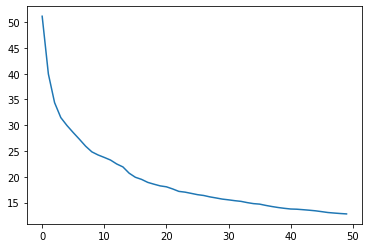

In [9]:
inertias_eucl=[]
for i in range(1,51):
    #print(i)
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)
    kmeans.fit(X_paa)
    inertias_eucl.append(kmeans.inertia_)
    
kmeans_centers= kmeans.cluster_centers_[:,:,0]
kmeans_centers[0].T
plt.plot(inertias_eucl)
plt.show()


In [10]:
kn = KneeLocator(range(len(inertias_eucl)), inertias_eucl, curve='convex', direction='decreasing')
print(kn.knee)

8


In [11]:
'''
for i in range(1,51):
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)
    kmeans.fit(X_paa)
    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
    print("number of clusters:", i)
    print('labels', dict(zip(bins, hist)))
    print('sse', kmeans.inertia_)
'''

'\nfor i in range(1,51):\n    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)\n    kmeans.fit(X_paa)\n    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))\n    print("number of clusters:", i)\n    print(\'labels\', dict(zip(bins, hist)))\n    print(\'sse\', kmeans.inertia_)\n'

In [12]:
'''
#8 sembra essere il migliore
kmeans = TimeSeriesKMeans(n_clusters=8, metric="euclidean", max_iter=15, random_state=0)
kmeans.fit(X_paa)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print("number of clusters: 8")
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
'''

'\n#8 sembra essere il migliore\nkmeans = TimeSeriesKMeans(n_clusters=8, metric="euclidean", max_iter=15, random_state=0)\nkmeans.fit(X_paa)\nhist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))\nprint("number of clusters: 8")\nprint(\'labels\', dict(zip(bins, hist)))\nprint(\'sse\', kmeans.inertia_)\n'

# n_paa segments = 15

In [13]:
n_paa_segments = 15
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X_decimated_scaled_max)

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


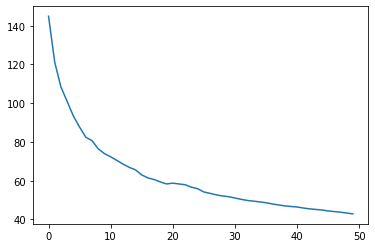

In [14]:
inertias_eucl=[]
for i in range(1,51):
    #print(i)
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)
    kmeans.fit(X_paa)
    inertias_eucl.append(kmeans.inertia_)
    
kmeans_centers= kmeans.cluster_centers_[:,:,0]
kmeans_centers[0].T
plt.plot(inertias_eucl)
plt.show()

In [15]:
kn = KneeLocator(range(len(inertias_eucl)), inertias_eucl, curve='convex', direction='decreasing')
print(kn.knee)

15


# n_paa segments = 20


In [16]:
n_paa_segments = 20
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa2 = paa.fit_transform(X_decimated_scaled_max)

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


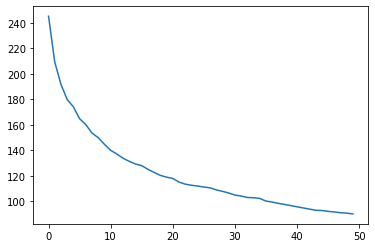

In [17]:
inertias_eucl=[]
for i in range(1,51):
    #print(i)
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)
    kmeans.fit(X_paa2)
    inertias_eucl.append(kmeans.inertia_)
    
kmeans_centers= kmeans.cluster_centers_[:,:,0]
kmeans_centers[0].T
plt.plot(inertias_eucl)
plt.show()

In [18]:
kn = KneeLocator(range(len(inertias_eucl)), inertias_eucl, curve='convex', direction='decreasing')
print(kn.knee)

12


In [19]:
#come varia l'inertia al variare del numero di segmenti, fare grafico con ogni 5 segmenti (10-50) distanza euclidea
#prima guarda come varia il numero di cluster al variare dei segmenti (13 clusters)

# n_paa segments = 25

In [20]:
n_paa_segments = 25
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X_decimated_scaled_max)

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


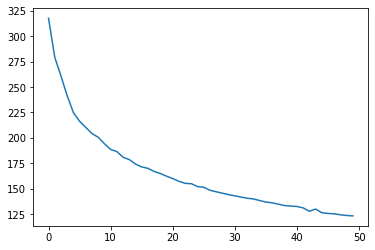

In [21]:
inertias_eucl=[]
for i in range(1,51):
    #print(i)
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)
    kmeans.fit(X_paa)
    inertias_eucl.append(kmeans.inertia_)
    
kmeans_centers= kmeans.cluster_centers_[:,:,0]
kmeans_centers[0].T
plt.plot(inertias_eucl)
plt.show()

In [22]:
kn = KneeLocator(range(len(inertias_eucl)), inertias_eucl, curve='convex', direction='decreasing')
print(kn.knee)

14


# n_paa segments = 30

In [23]:
n_paa_segments = 30
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X_decimated_scaled_max)

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


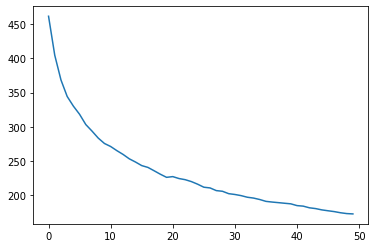

In [24]:
inertias_eucl=[]
for i in range(1,51):
    #print(i)
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)
    kmeans.fit(X_paa)
    inertias_eucl.append(kmeans.inertia_)
    
kmeans_centers= kmeans.cluster_centers_[:,:,0]
kmeans_centers[0].T
plt.plot(inertias_eucl)
plt.show()

In [25]:
kn = KneeLocator(range(len(inertias_eucl)), inertias_eucl, curve='convex', direction='decreasing')
print(kn.knee)

13


# n_paa segments = 35

In [26]:
n_paa_segments = 35
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X_decimated_scaled_max)

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


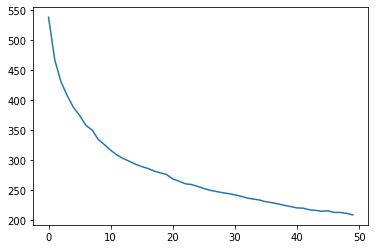

In [27]:
inertias_eucl=[]
for i in range(1,51):
    #print(i)
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)
    kmeans.fit(X_paa)
    inertias_eucl.append(kmeans.inertia_)
    
kmeans_centers= kmeans.cluster_centers_[:,:,0]
kmeans_centers[0].T
plt.plot(inertias_eucl)
plt.show()

In [28]:
kn = KneeLocator(range(len(inertias_eucl)), inertias_eucl, curve='convex', direction='decreasing')
print(kn.knee)

11


# n_paa segments = 40

In [29]:
n_paa_segments = 40
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X_decimated_scaled_max)

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


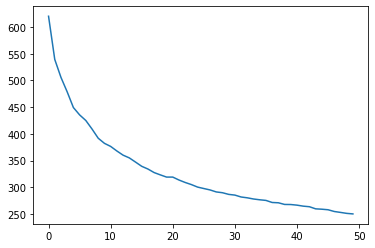

In [30]:
inertias_eucl=[]
for i in range(1,51):
    #print(i)
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)
    kmeans.fit(X_paa)
    inertias_eucl.append(kmeans.inertia_)
    
kmeans_centers= kmeans.cluster_centers_[:,:,0]
kmeans_centers[0].T
plt.plot(inertias_eucl)
plt.show()

In [31]:
kn = KneeLocator(range(len(inertias_eucl)), inertias_eucl, curve='convex', direction='decreasing')
print(kn.knee)

15


# n_paa segments = 45

In [32]:
n_paa_segments = 45
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X_decimated_scaled_max)

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


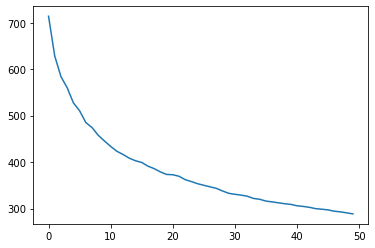

In [33]:
inertias_eucl=[]
for i in range(1,51):
    #print(i)
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)
    kmeans.fit(X_paa)
    inertias_eucl.append(kmeans.inertia_)
    
kmeans_centers= kmeans.cluster_centers_[:,:,0]
kmeans_centers[0].T
plt.plot(inertias_eucl)
plt.show()

In [34]:
kn = KneeLocator(range(len(inertias_eucl)), inertias_eucl, curve='convex', direction='decreasing')
print(kn.knee)

11


# n_paa segments = 50

In [35]:
n_paa_segments = 50
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X_decimated_scaled_max)

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


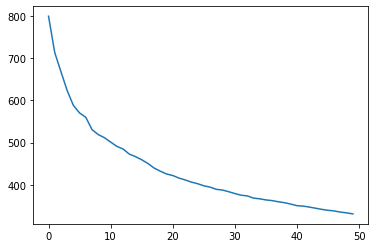

In [36]:
inertias_eucl=[]
for i in range(1,51):
    #print(i)
    kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)
    kmeans.fit(X_paa)
    inertias_eucl.append(kmeans.inertia_)
    
kmeans_centers= kmeans.cluster_centers_[:,:,0]
kmeans_centers[0].T
plt.plot(inertias_eucl)
plt.show()

In [37]:
kn = KneeLocator(range(len(inertias_eucl)), inertias_eucl, curve='convex', direction='decreasing')
print(kn.knee)

17


In [38]:
'''
n_segm = [10,15,20,25,30,35,40,45,50]
n_clust = []
inertias_eucl=[]
for n in n_segm:
    n_paa_segments = n
    paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
    X_paa = paa.fit_transform(X_decimated_scaled_max)
    for i in range(1,51):
    #print(i)
        kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)
        kmeans.fit(X_paa)
        inertias_eucl.append(kmeans.inertia_) 
    kmeans_centers= kmeans.cluster_centers_[:,:,0]
    kmeans_centers[0].T
    #plt.plot(inertias_eucl)
    #plt.show()
    kn = KneeLocator(range(len(inertias_eucl)), inertias_eucl, curve='convex', direction='decreasing')
    print(kn.knee, "number of segments:", n)
    n_clust.append(kn.knee)
'''

'\nn_segm = [10,15,20,25,30,35,40,45,50]\nn_clust = []\ninertias_eucl=[]\nfor n in n_segm:\n    n_paa_segments = n\n    paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)\n    X_paa = paa.fit_transform(X_decimated_scaled_max)\n    for i in range(1,51):\n    #print(i)\n        kmeans = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=15, random_state=0)\n        kmeans.fit(X_paa)\n        inertias_eucl.append(kmeans.inertia_) \n    kmeans_centers= kmeans.cluster_centers_[:,:,0]\n    kmeans_centers[0].T\n    #plt.plot(inertias_eucl)\n    #plt.show()\n    kn = KneeLocator(range(len(inertias_eucl)), inertias_eucl, curve=\'convex\', direction=\'decreasing\')\n    print(kn.knee, "number of segments:", n)\n    n_clust.append(kn.knee)\n'

<function matplotlib.pyplot.show(close=None, block=None)>

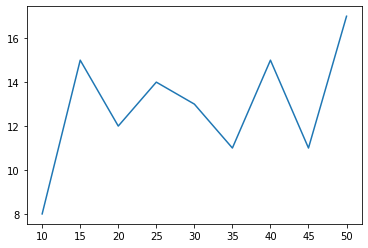

In [39]:
n_segm = [10,15,20,25,30,35,40,45,50]
n_clus = [8,15,12,14,13,11,15,11,17]
plt.plot(n_segm, n_clus)
plt.show

In [40]:
#la media del numero di cluster è 12.9, scelgo 13

In [41]:
#fare grafico di come varia la inertia al variare dei segmenti

In [42]:
n_segm = [10,15,20,25,30,35,40,45,50]
inertias_eucl=[]
sil_eucl = []
for i in n_segm:
    n_paa_segments = i
    paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
    X_paa = paa.fit_transform(X_decimated_scaled_max)
    kmeans = TimeSeriesKMeans(n_clusters=13, metric="euclidean", max_iter=15, random_state=0)
    kmeans.fit(X_paa)
    inertias_eucl.append(kmeans.inertia_)
    sil_eucl.append(silhouette_score(np.squeeze(X_paa), kmeans.labels_))

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/jacopogneri/opt/anaconda3

In [43]:
inertias_eucl

[22.49644432940371,
 68.589787720278,
 133.8144217899529,
 180.97526906777543,
 259.5809347974496,
 303.25639584339723,
 360.2853680946007,
 416.5005241190911,
 484.8694854384076]

In [44]:
print(sil_eucl)
print(max(sil_eucl)-min(sil_eucl))

[0.11445720213894982, 0.12276445059523385, 0.0981730920749708, 0.09846555122785497, 0.092283221367914, 0.09739248918363994, 0.08929697648774713, 0.09046582935738053, 0.08299099946985429]
0.039773451125379555


<function matplotlib.pyplot.show(close=None, block=None)>

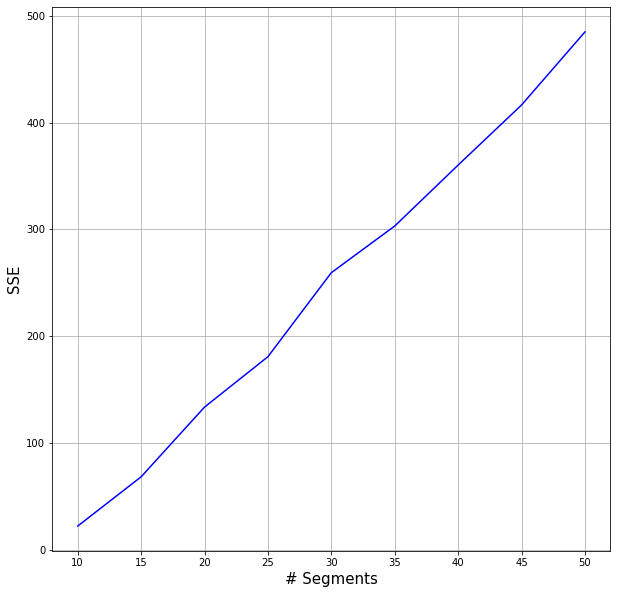

In [60]:
plt.figure(figsize=(10,10))
plt.plot(n_segm, inertias_eucl, color="blue")
plt.grid(True)
plt.xlabel("# Segments", fontsize=15)
plt.ylabel("SSE", fontsize=15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

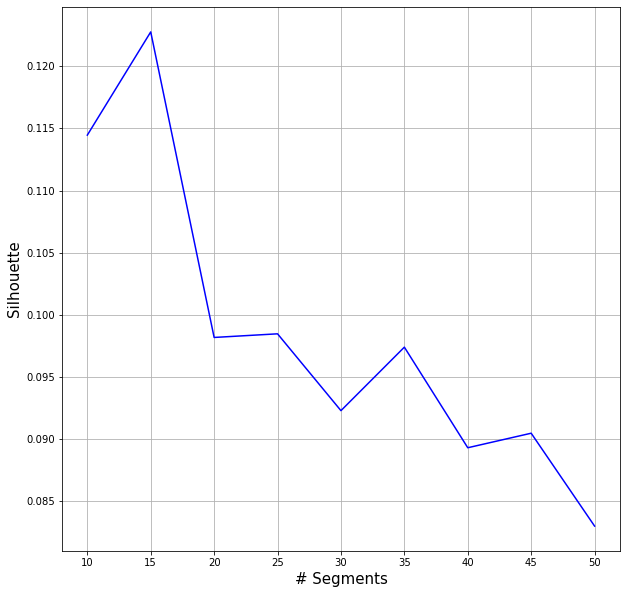

In [61]:
plt.figure(figsize=(10,10))
plt.plot(n_segm, sil_eucl, color="blue")
plt.grid(True)
plt.xlabel("# Segments", fontsize=15)
plt.ylabel("Silhouette", fontsize=15)
plt.show

In [47]:
paa = PiecewiseAggregateApproximation(n_segments=10)
X_paa = paa.fit_transform(X_decimated_scaled_max)
kmeans = TimeSeriesKMeans(n_clusters=13, metric="euclidean", max_iter=15, random_state=0)
kmeans.fit(X_paa)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print("number of clusters: 13")
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(np.squeeze(X_paa), kmeans.labels_))

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


number of clusters: 13
labels {0: 316, 1: 254, 2: 477, 3: 58, 4: 146, 5: 491, 6: 61, 7: 79, 8: 139, 9: 19, 10: 223, 11: 55, 12: 134}
sse 22.49644432940371
silhouette 0.11445720213894982


In [48]:
approx_centers= kmeans.cluster_centers_[:,:,0]
approx_centers.shape

(13, 10)

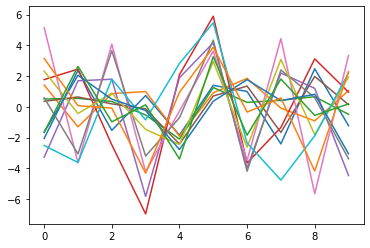

In [49]:
plt.plot(np.squeeze(kmeans.cluster_centers_).T)
plt.show()

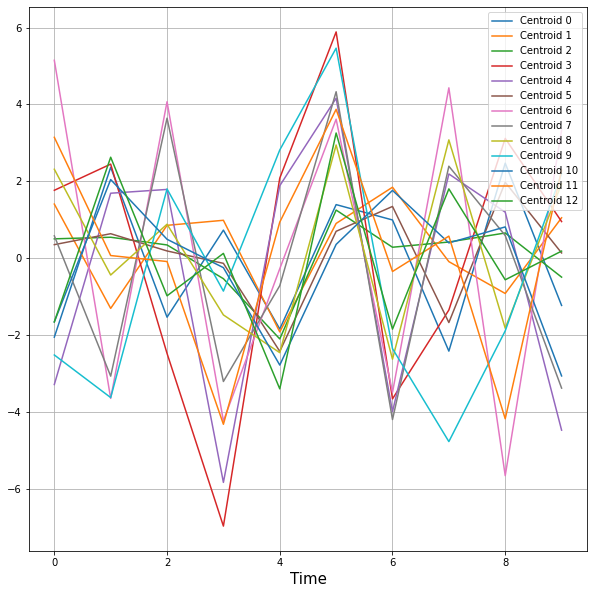

In [50]:
plt.figure(figsize=(10,10))
for i in range(len(approx_centers)):
    plt.plot(approx_centers[i], label="Centroid "+str(i))
plt.legend(loc="upper right")
plt.xlabel("Time", fontsize=15)
plt.grid(True)
plt.show()

# Motif disc

In [51]:
from matrixprofile import *

In [52]:
#motif discovery dei 13 center

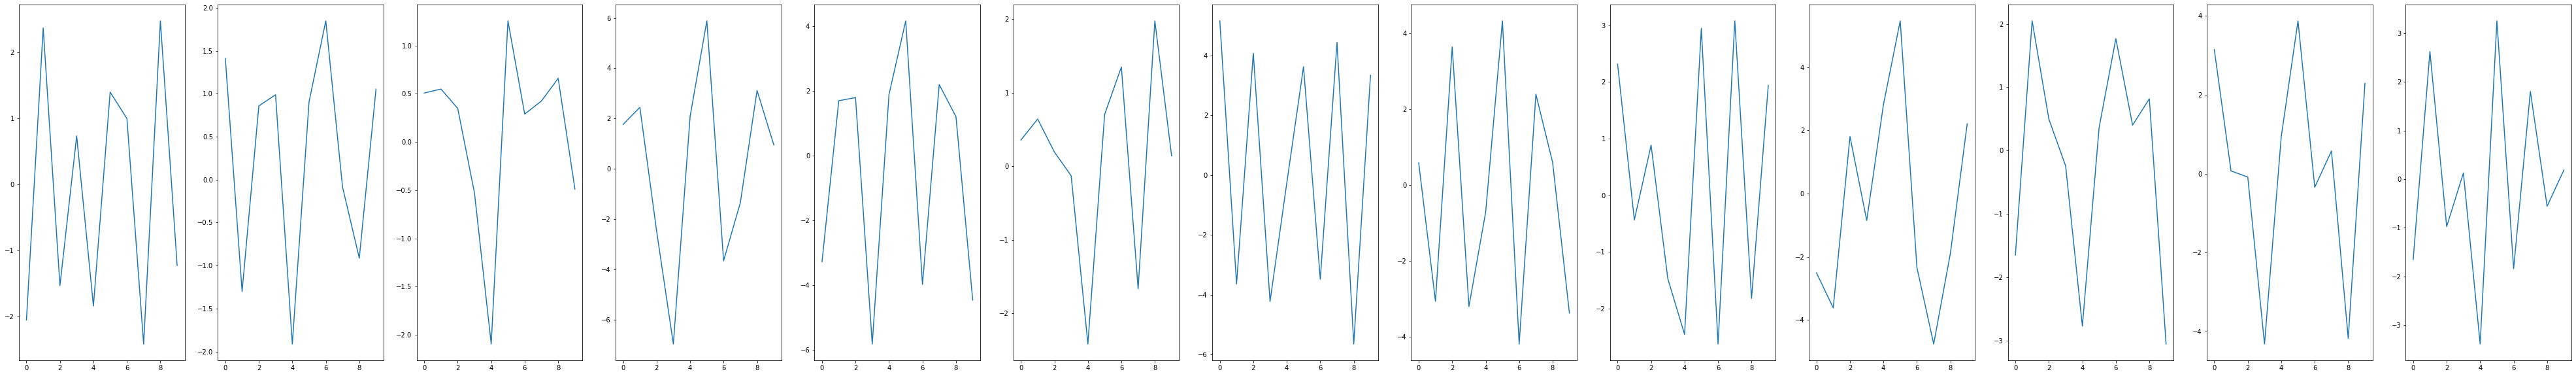

In [53]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12) = plt.subplots(1, 13, figsize=(70,10))
ax0.plot(kmeans.cluster_centers_[0])
ax1.plot(kmeans.cluster_centers_[1])
ax2.plot(kmeans.cluster_centers_[2])
ax3.plot(kmeans.cluster_centers_[3])
ax4.plot(kmeans.cluster_centers_[4])
ax5.plot(kmeans.cluster_centers_[5])
ax6.plot(kmeans.cluster_centers_[6])
ax7.plot(kmeans.cluster_centers_[7])
ax8.plot(kmeans.cluster_centers_[8])
ax9.plot(kmeans.cluster_centers_[9])
ax10.plot(kmeans.cluster_centers_[10])
ax11.plot(kmeans.cluster_centers_[11])
ax12.plot(kmeans.cluster_centers_[12])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

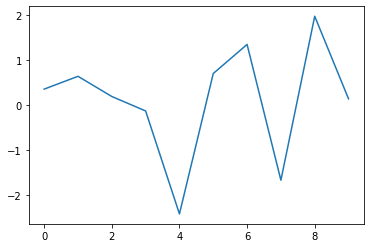

In [54]:
#prendo il center del cluster più popolato (?)
ts5 = kmeans.cluster_centers_[5]
plt.plot(ts5)
plt.show

In [55]:
ts5

array([[ 0.35591341],
       [ 0.64086003],
       [ 0.19219426],
       [-0.12974253],
       [-2.41880862],
       [ 0.70296575],
       [ 1.34932725],
       [-1.66903639],
       [ 1.97642375],
       [ 0.14040496]])

<function matplotlib.pyplot.show(close=None, block=None)>

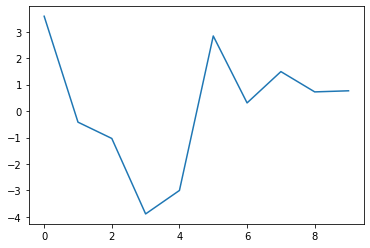

In [56]:
ts6 = X_paa[1]
plt.plot(ts6)
plt.show

In [57]:
w = 20
mp, mpi = matrixProfile.stomp(ts6, w)
plt.plot(mp)
plt.show()

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/matrixprofile/matrixProfile.py:141: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if n_threads is -1:
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/matrixprofile/matrixProfile.py:141: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if n_threads is -1:
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/matrixprofile/matrixProfile.py:141: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if n_threads is -1:
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/matrixprofile/matrixProfile.py:141: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if n_threads is -1:
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/matrixprofile/matrixProfile.py:141: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if n_threads is -1:
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/matrixprofile/matrixProfile.py:141: SyntaxWarning: "is" with a litera

ValueError: negative dimensions are not allowed